In [44]:
import numpy as np
import cv2, random, sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

%matplotlib inline

np.set_printoptions(threshold=sys.maxsize)

In [45]:
img = cv2.imread('images/test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

small = cv2.imread('images/small.png')
small_gray = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)

imsize = 512
noise = np.random.rand(imsize, imsize)*255

Text(0.5, 1.0, 'small.png')

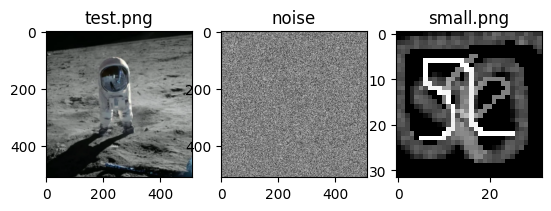

In [46]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(noise, cmap='gray')
axs[2].imshow(small_gray, cmap='gray')

axs[0].set_title("test.png")
axs[1].set_title("noise")
axs[2].set_title("small.png")

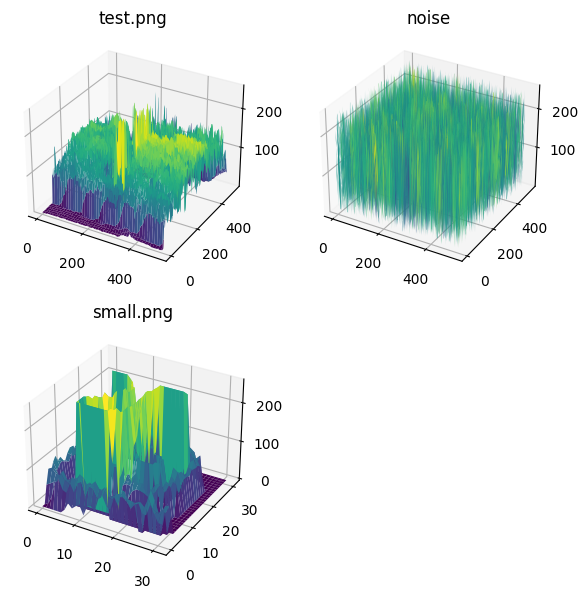

In [67]:
plot_size = 7

heightmap = plt.figure(figsize=(plot_size, plot_size))
plt1 = heightmap.add_subplot(221, projection='3d')
plt2 = heightmap.add_subplot(222, projection='3d')
plt3 = heightmap.add_subplot(223, projection='3d')

x1 = y1 = range(imsize)
X1, Y1 = np.meshgrid(x1, y1)  # `plot_surface` expects `x` and `y` data to be 2D

x2 = y2 = range(small.shape[0])
X2, Y2 = np.meshgrid(x2, y2)

plt1.plot_surface(X1, Y1, gray, cmap="viridis")
plt2.plot_surface(X1, Y1, noise, cmap="viridis")
plt3.plot_surface(X2, Y2, small_gray, cmap="viridis")

plt1.set_title("test.png")
plt2.set_title("noise")
plt3.set_title("small.png")

plt.show()

In [68]:
def apply_filter(kernel, image, x, y):
    # neighbourhood is of size (2a+1)x(2b+1)
    a = (kernel.shape[0] - 1) // 2
    b = (kernel.shape[1] - 1) // 2
    size = image.shape[0]
    sum = 0
    for i in range(-a, a+1, 1):
        for j in range(-b, b+1, 1):
            value = image[(x+i) % size][(y+j) % size]
            sum += kernel[i][j] * value
    return sum

def linear_filter(kernel, image):
    filtered = np.copy(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            filtered[x][y] = apply_filter(kernel, image, x, y)
    return filtered

In [69]:
n = 5
kernels = {}

# identity filter
kernelI = np.zeros((n, n))
kernelI[(n-1)//2][(n-1)//2] = 1
kernels["identity"] = kernelI

# primitive smoothing filter
kernel_smooth = 1/(n**2) * np.ones((n, n))
kernels["smooth"] = kernel_smooth

# left shift
kernel_Lshift = np.zeros((n, n))
kernel_Lshift[(n-1)//2][0] = 1
kernels["L shift"] = kernel_Lshift

# primitive sharpening filter
kernel_sharpen = 2 * kernelI - kernel_smooth
kernels["sharpen"] = kernel_sharpen

# gaussian blur
def gaussian_kernel(size=n, sigma=1):
    """Returns a 2D Gaussian kernel array."""
    gaussian_kernel1D = signal.gaussian(size, std=sigma).reshape(size, 1)
    gaussian_kernel2D = np.outer(gaussian_kernel1D, gaussian_kernel1D)
    normalizing_factor = 1/(2*np.pi)
    return gaussian_kernel2D * normalizing_factor

kernel_gaussian = gaussian_kernel(size=n)
kernels["gaussian blur"] = kernel_gaussian

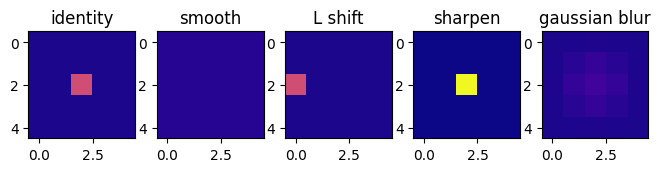

In [71]:
# combine data for all kernels to set a uniform colormap
combined_data = np.array([kernelI, kernel_smooth, kernel_Lshift, kernel_sharpen])
_min, _max = np.amin(combined_data), np.amax(combined_data)

plot_size = 8
fig, axs = plt.subplots(1, len(kernels), figsize=(plot_size, plot_size))

colormap = "plasma"

i = 0
for key in kernels:
    axs[i].imshow(kernels[key], vmin = _min, vmax = _max, cmap = colormap)
    axs[i].set_title(key)
    i -=- 1

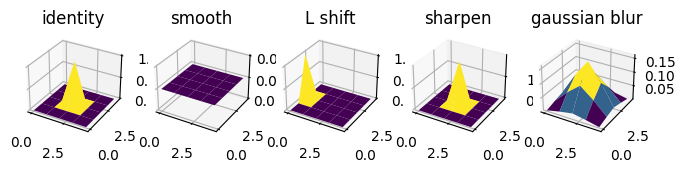

In [72]:
x = y = range(n)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(plot_size, plot_size))

axs = []
i = 0
for key in kernels:
    ax = fig.add_subplot(1, len(kernels), i+1, projection='3d')
    axs.append(ax)
    axs[i].plot_surface(X, Y, kernels[key], cmap="viridis")
    axs[i].set_title(key)
    i -=- 1
plt.show()

In [73]:
input = small_gray
filtered_images = {}
for key in kernels:
    filtered_images[key] = linear_filter(kernels[key], input)

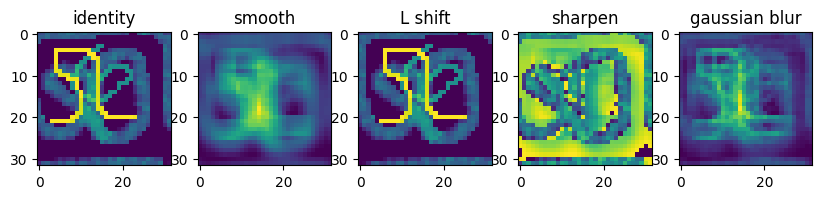

In [74]:
plot_size = 10
fig, axs = plt.subplots(1, len(kernels), figsize=(plot_size, plot_size))

i = 0
for key in filtered_images:
    axs[i].imshow(filtered_images[key])
    axs[i].set_title(key)
    i -=- 1

# axs[0][0].imshow(identity, cmap='gray')
# axs[0][1].imshow(smooth, cmap='gray')
# axs[1][0].imshow(shifted, cmap='gray')
# axs[1][1].imshow(sharpened, cmap='gray')

plt.show()
